# Seaborn 

가장 기본이 되는 막대 그래프 함수인 `barplot()`의 세부 사용법 확인

## #01. 데이터 준비

### [1] 패키치 참조

In [1]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel, melt

### [2] 그래프 초기화

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

In [3]:
origin = read_excel('https://data.hossam.kr/pydata/grade.xlsx', index_col='이름')
origin

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88
영호,4,남자,80,88,91,72
용식,2,남자,82,88,79,90
나영,1,여자,90,92,81,95
석영,1,남자,91,90,89,80


### [4] 데이터 전처리

In [4]:
df = origin.astype({"학년": "category", "성별": "category"})
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

## #02. 막대 그래프 그리기

### [1] 기본 사용 방법

`barplot()`함수는 기본적으로 집계가 완료된 데이터를 시각화 한다.

`x`축에 지정된 항목이 중복되지 않는다면 각 집단별 집계결과를 표시한다.

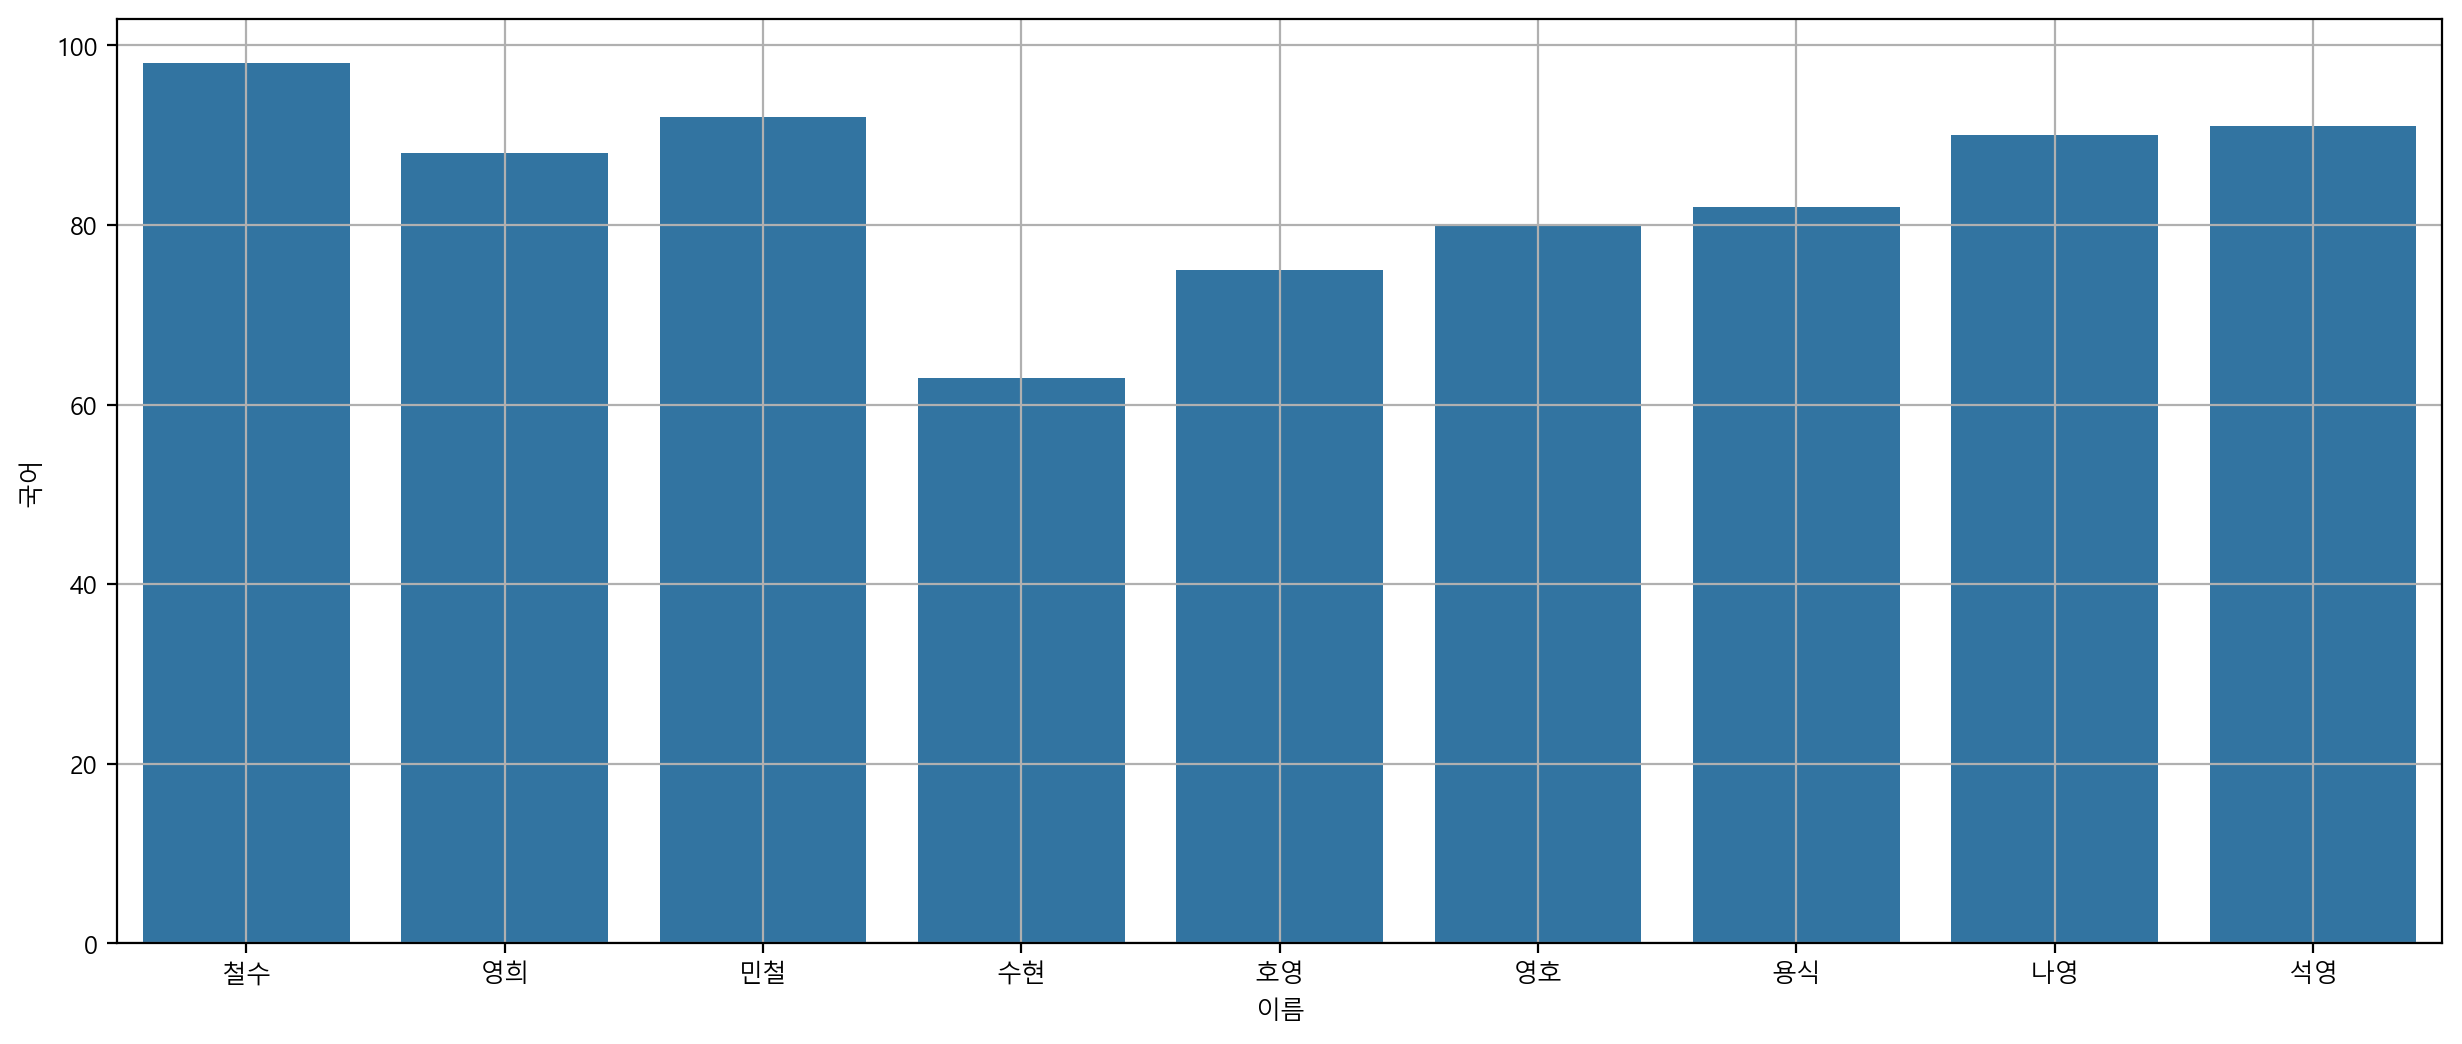

In [20]:
plt.figure()
sb.barplot(data=df, x=df.index, y='국어')
plt.grid()
plt.show()
plt.close()

### [2] 평균 막대 그래프

`x`축에 지정된 데이터에 중복된 값이 있다면 `y`축은 중복된 항목간의 평균값을 표시한다.

그래프에 표시되는 막대는 `95%` 신뢰구간을 의미한다.

신뢰구간을 변경하고자 하는 경우 `errorbar=('ci', 70)` 형식으로 파라미터 설정한다.

`errorbar=sd`라고 설정할 경우 신뢰구간이 아니라 표준편차를 표현할 수 있다.

> **신뢰구간 95%의 의미**
>
> 500명 중에서 5명씩 100번 선정하여 평균을 냈을 때 95%의 평균이 모여 있는 구간

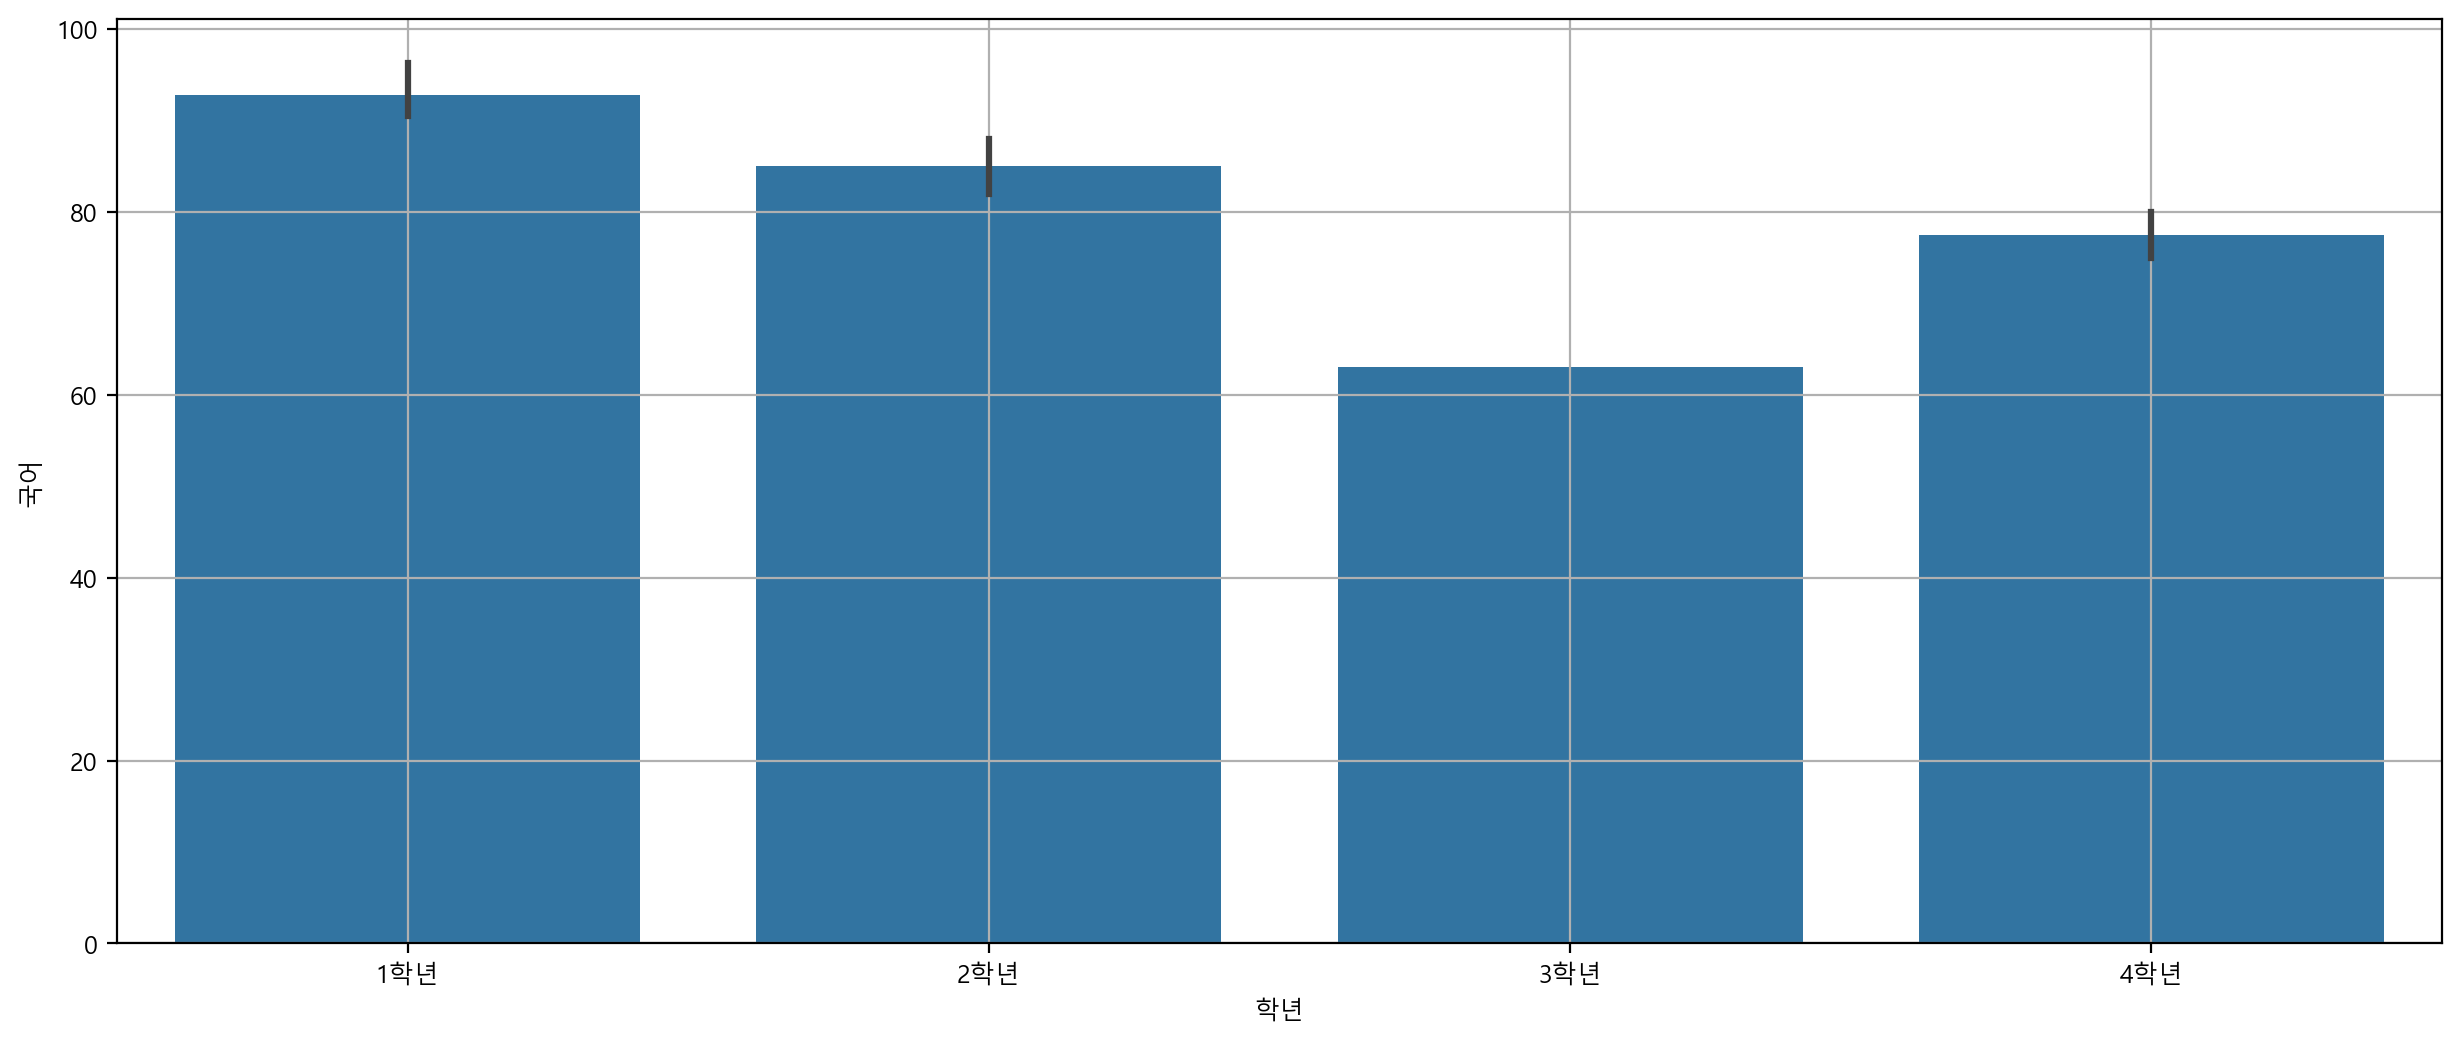

In [21]:
plt.figure()
sb.barplot(data=origin, x='학년', y='국어')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.grid()
plt.show()
plt.close()

### [3] 다른 지표 적용하기

`barplot()` 함수에 `estimator` 파라미터를 적용하면 다른 지표를 표시할 수 있다.

#### 합계

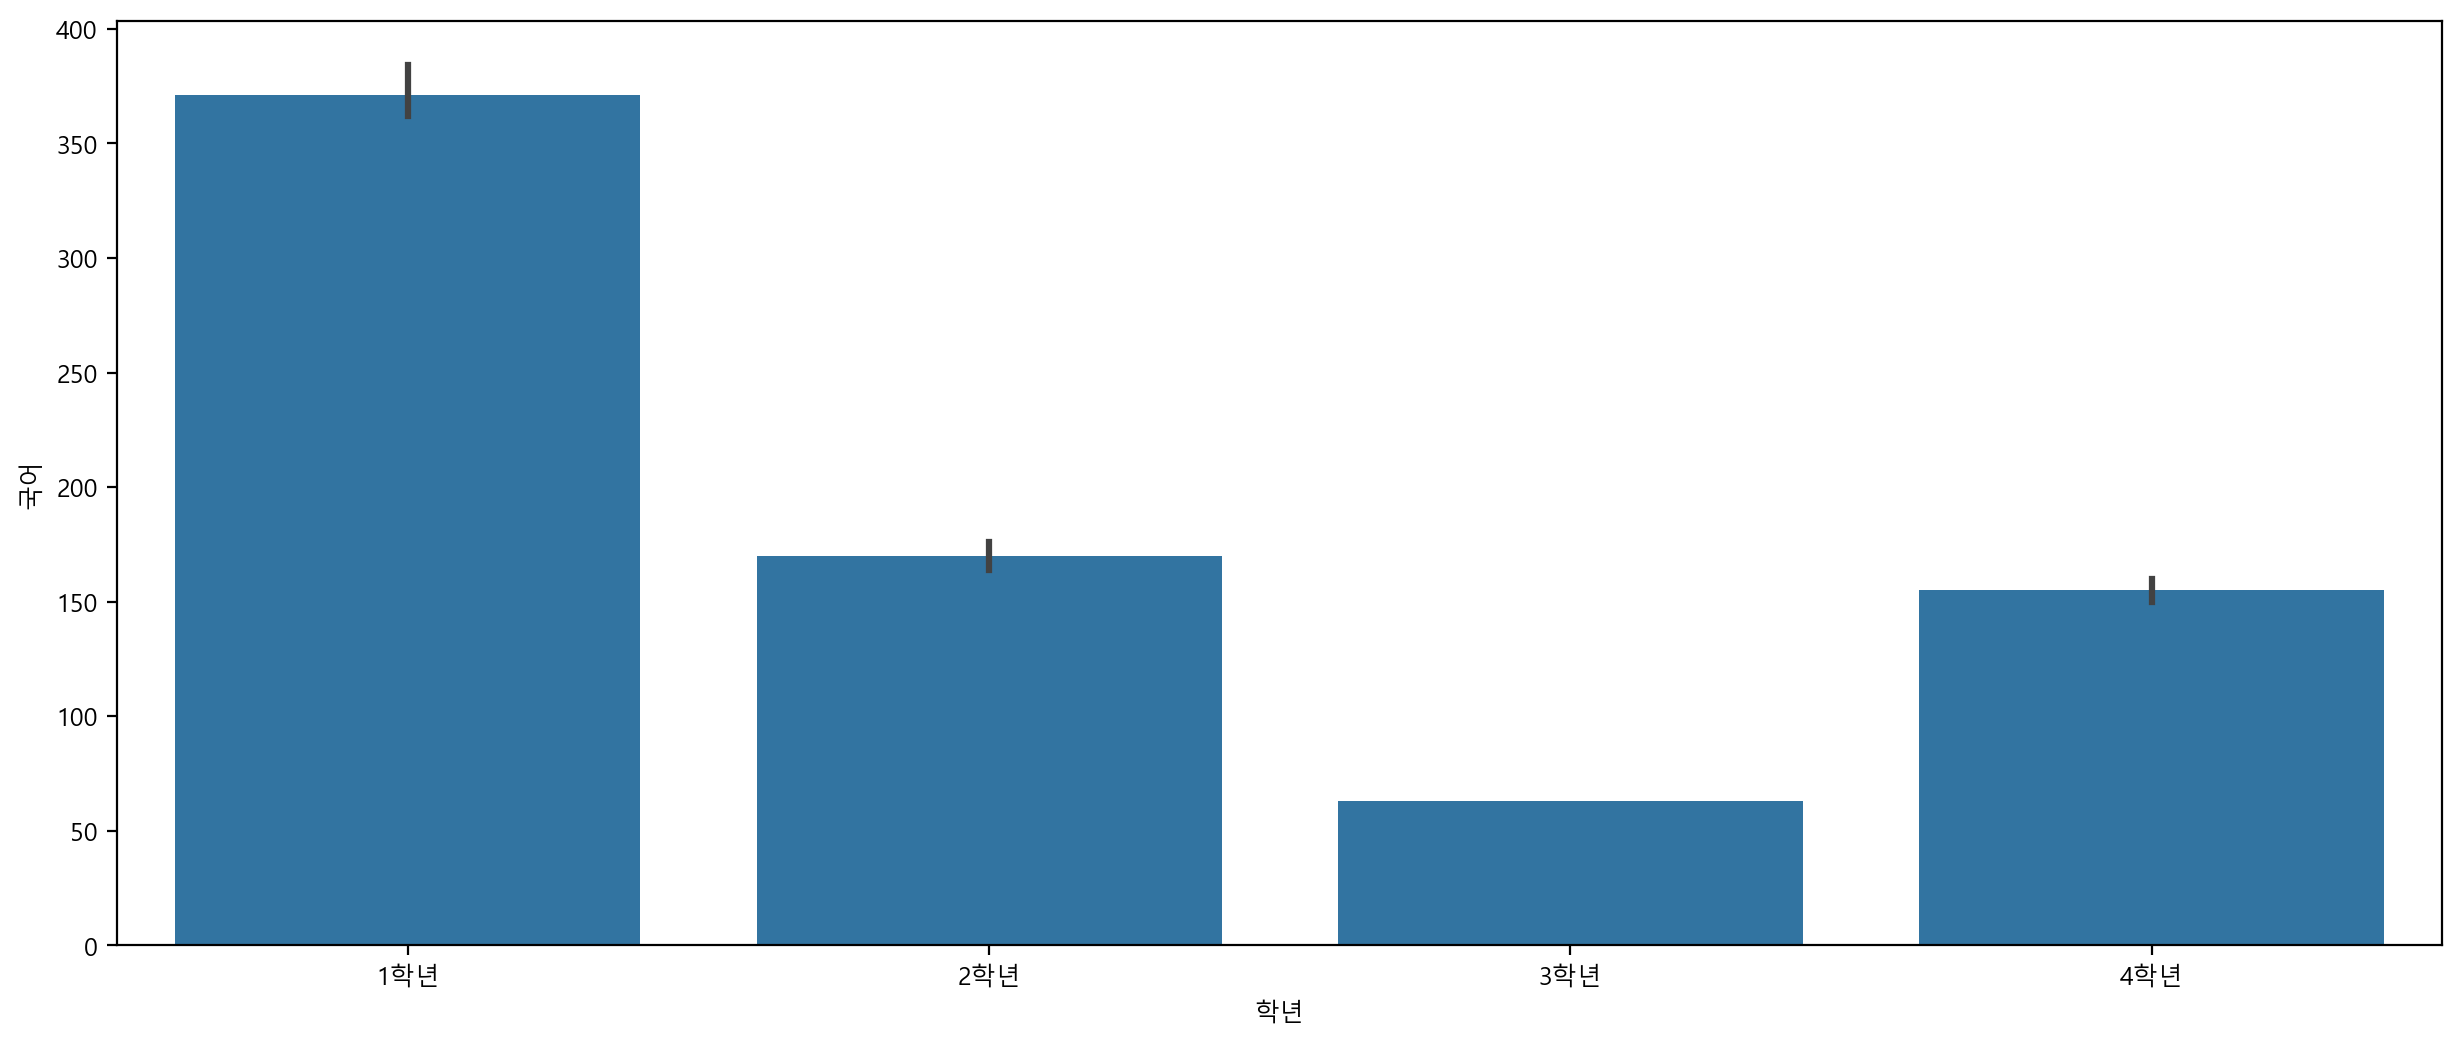

In [7]:
sb.barplot(data=df, x='학년', y='국어', estimator='sum')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()
plt.close()

#### 최대값

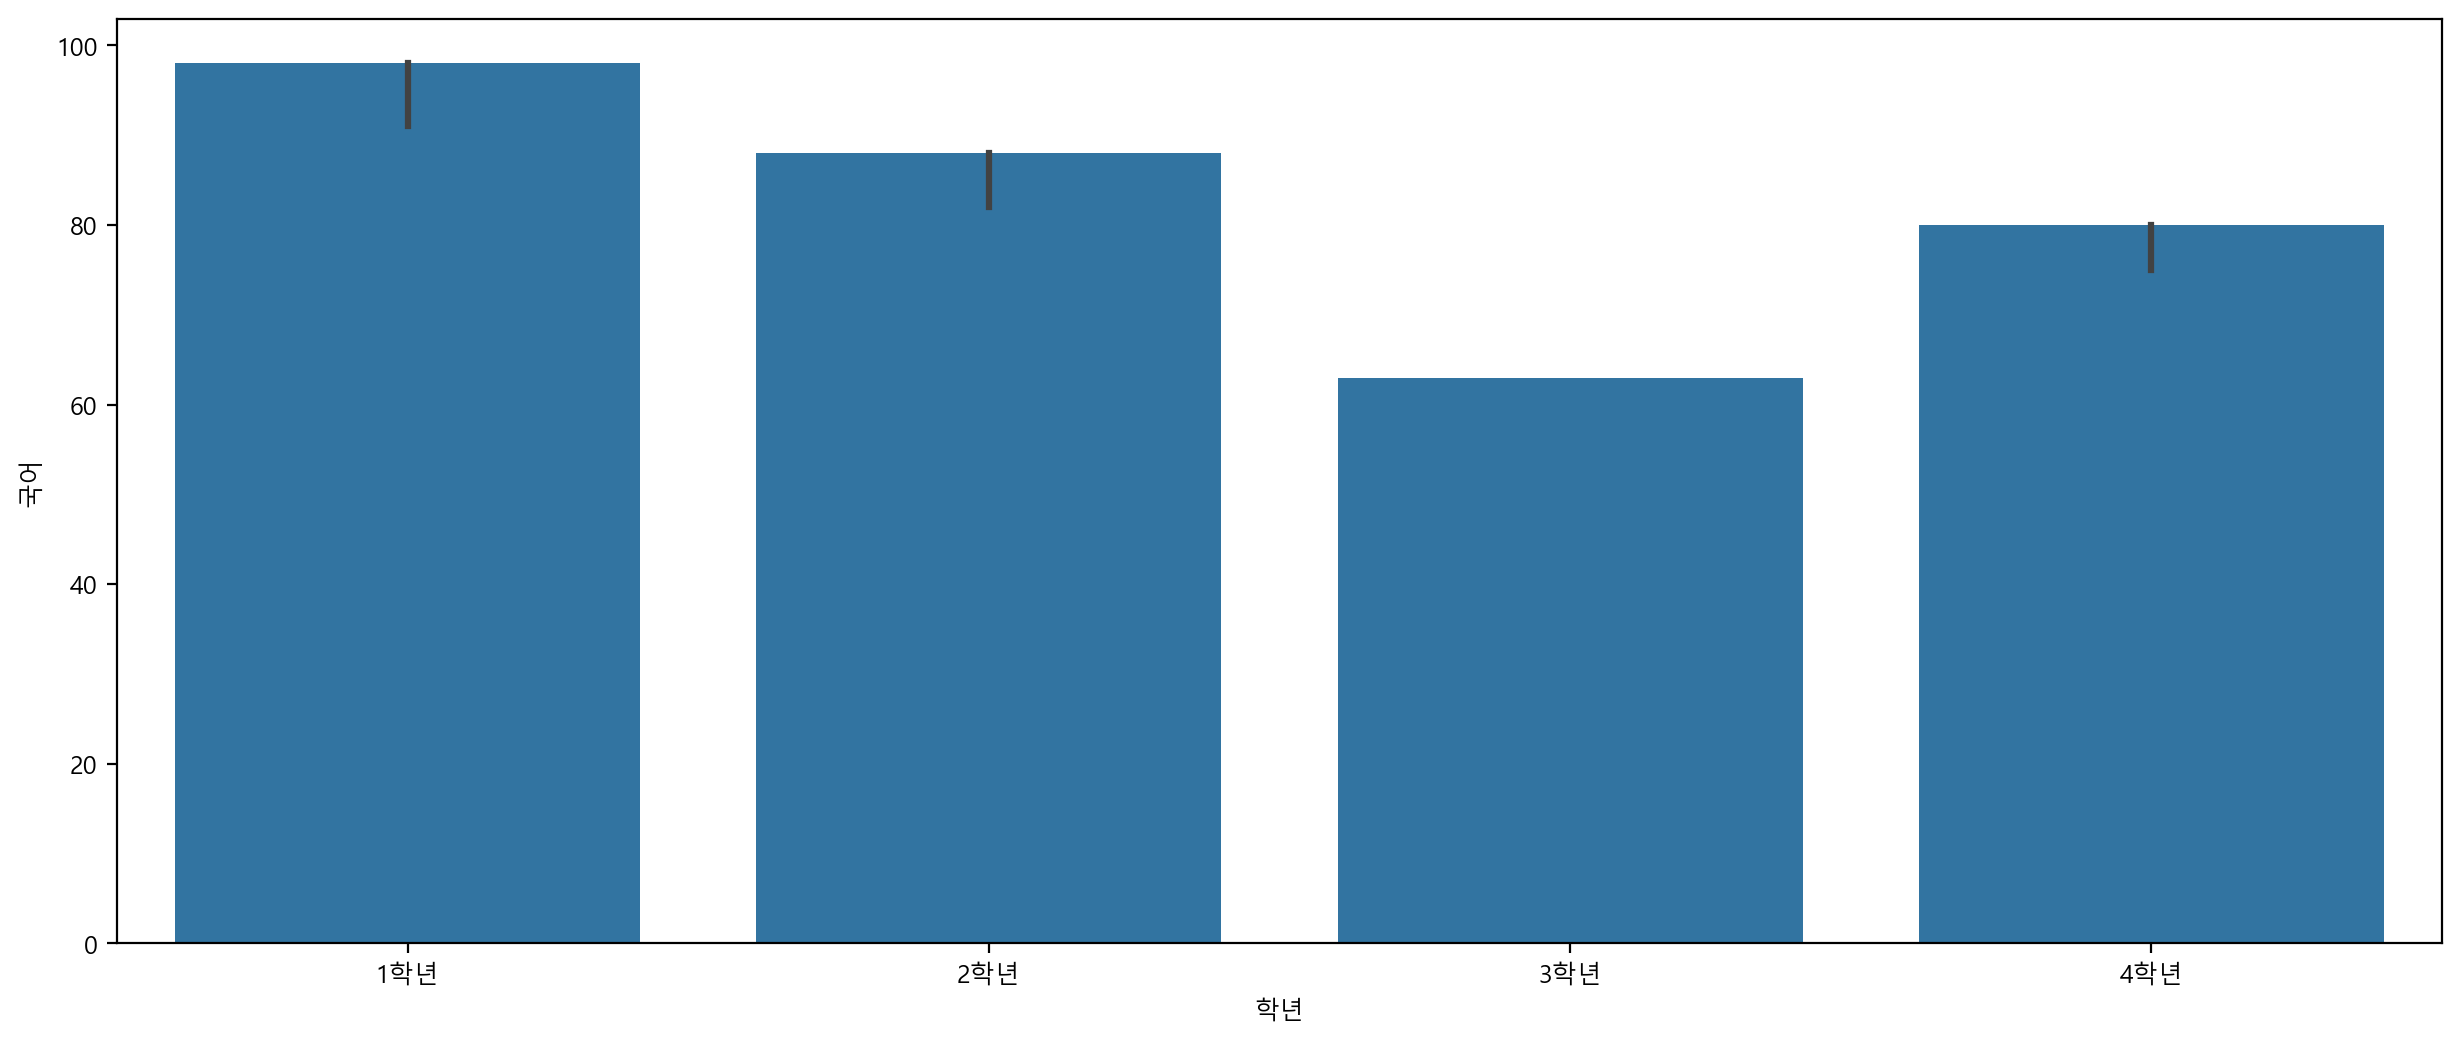

In [8]:
sb.barplot(data=df, x='학년', y='국어', estimator='max')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()
plt.close()

#### 최소값

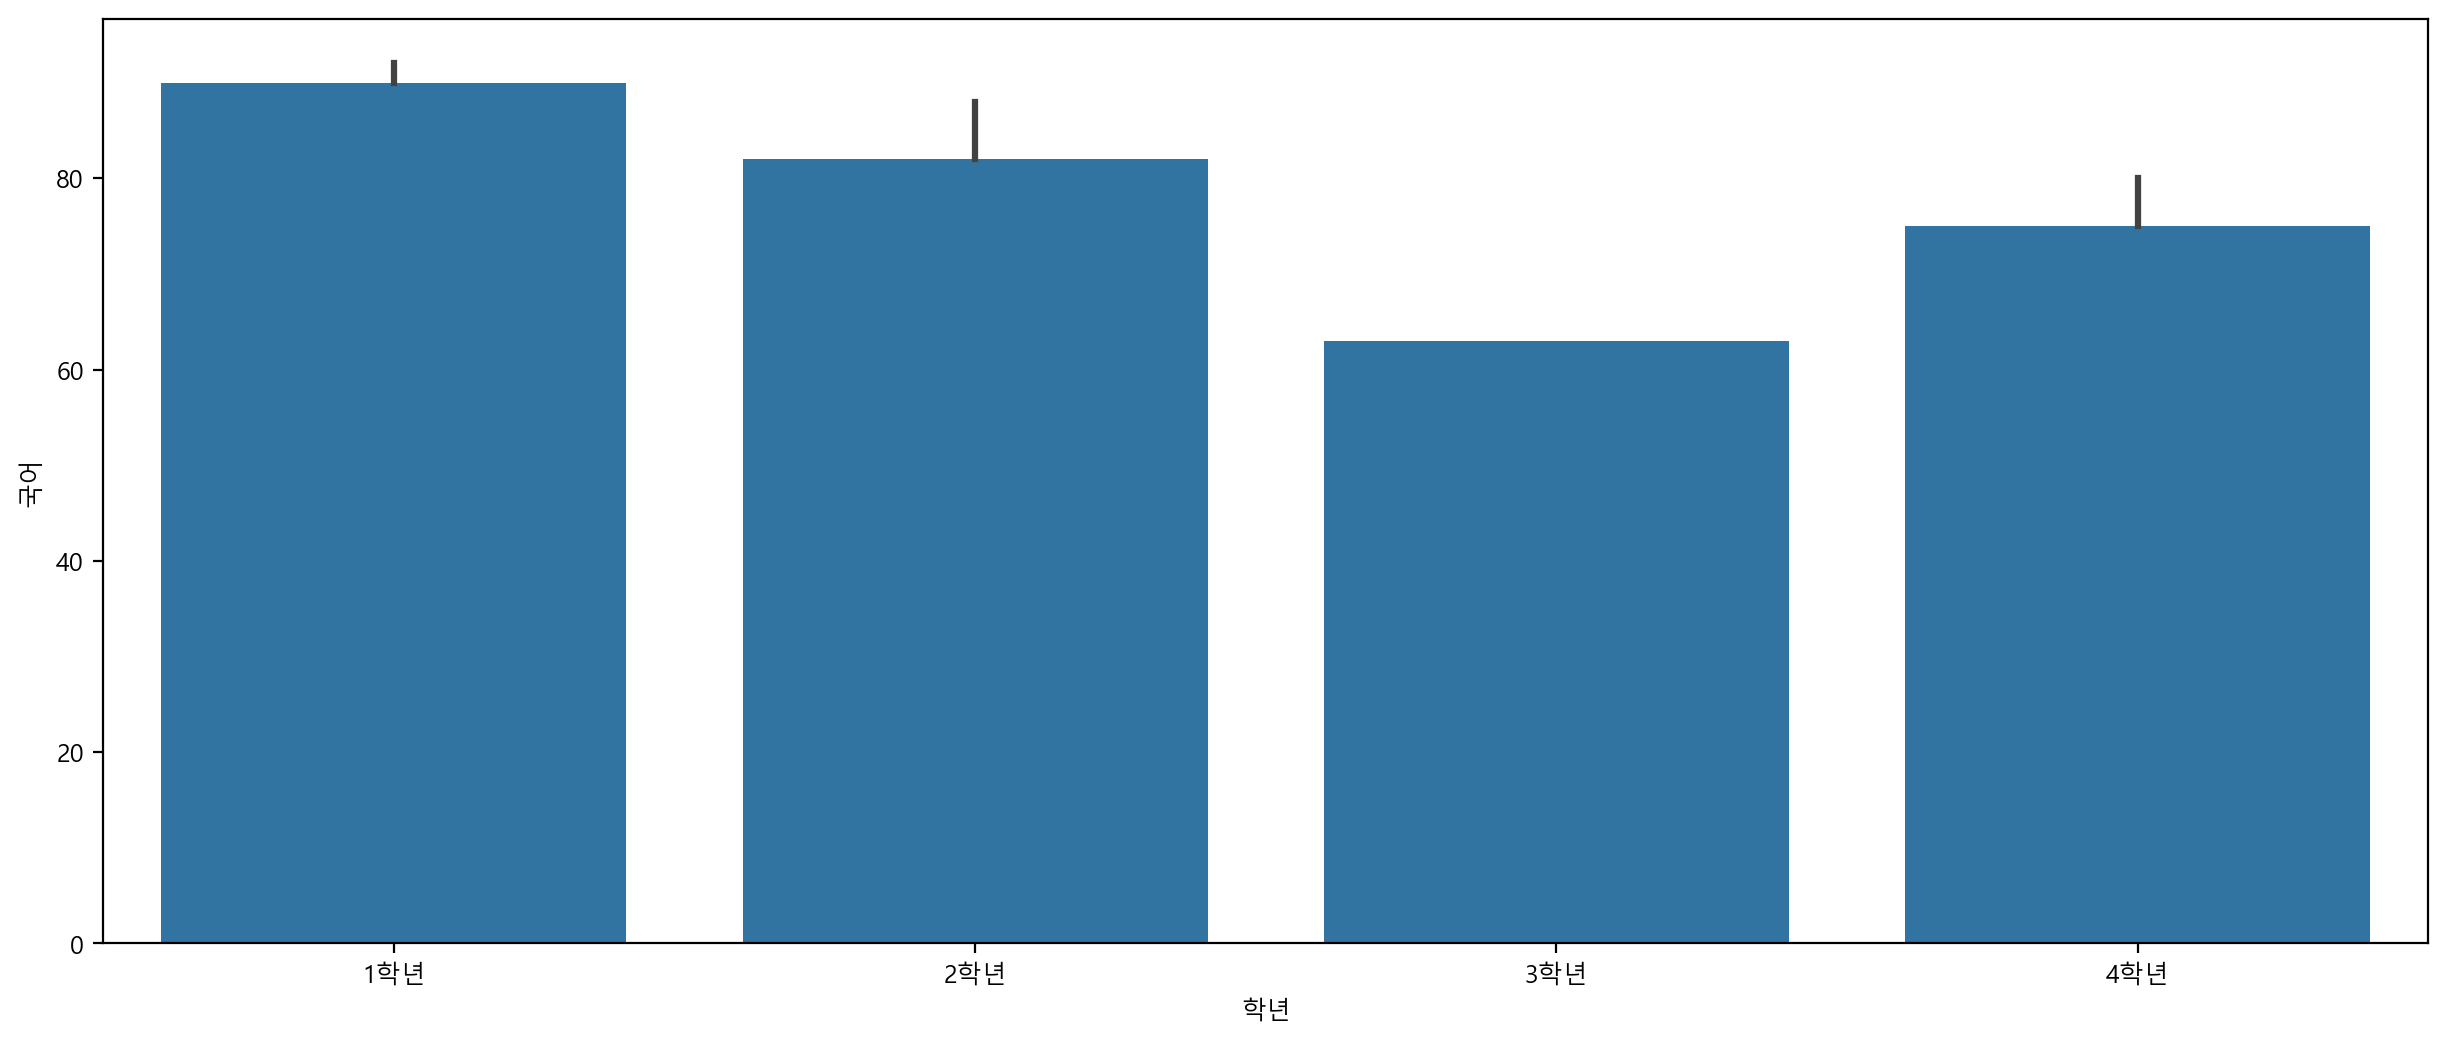

In [9]:
sb.barplot(data=df, x='학년', y='국어', estimator='min')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()
plt.close()

#### 중앙값

데이터를 순서대로 나열한 후 가운데 위치한 값

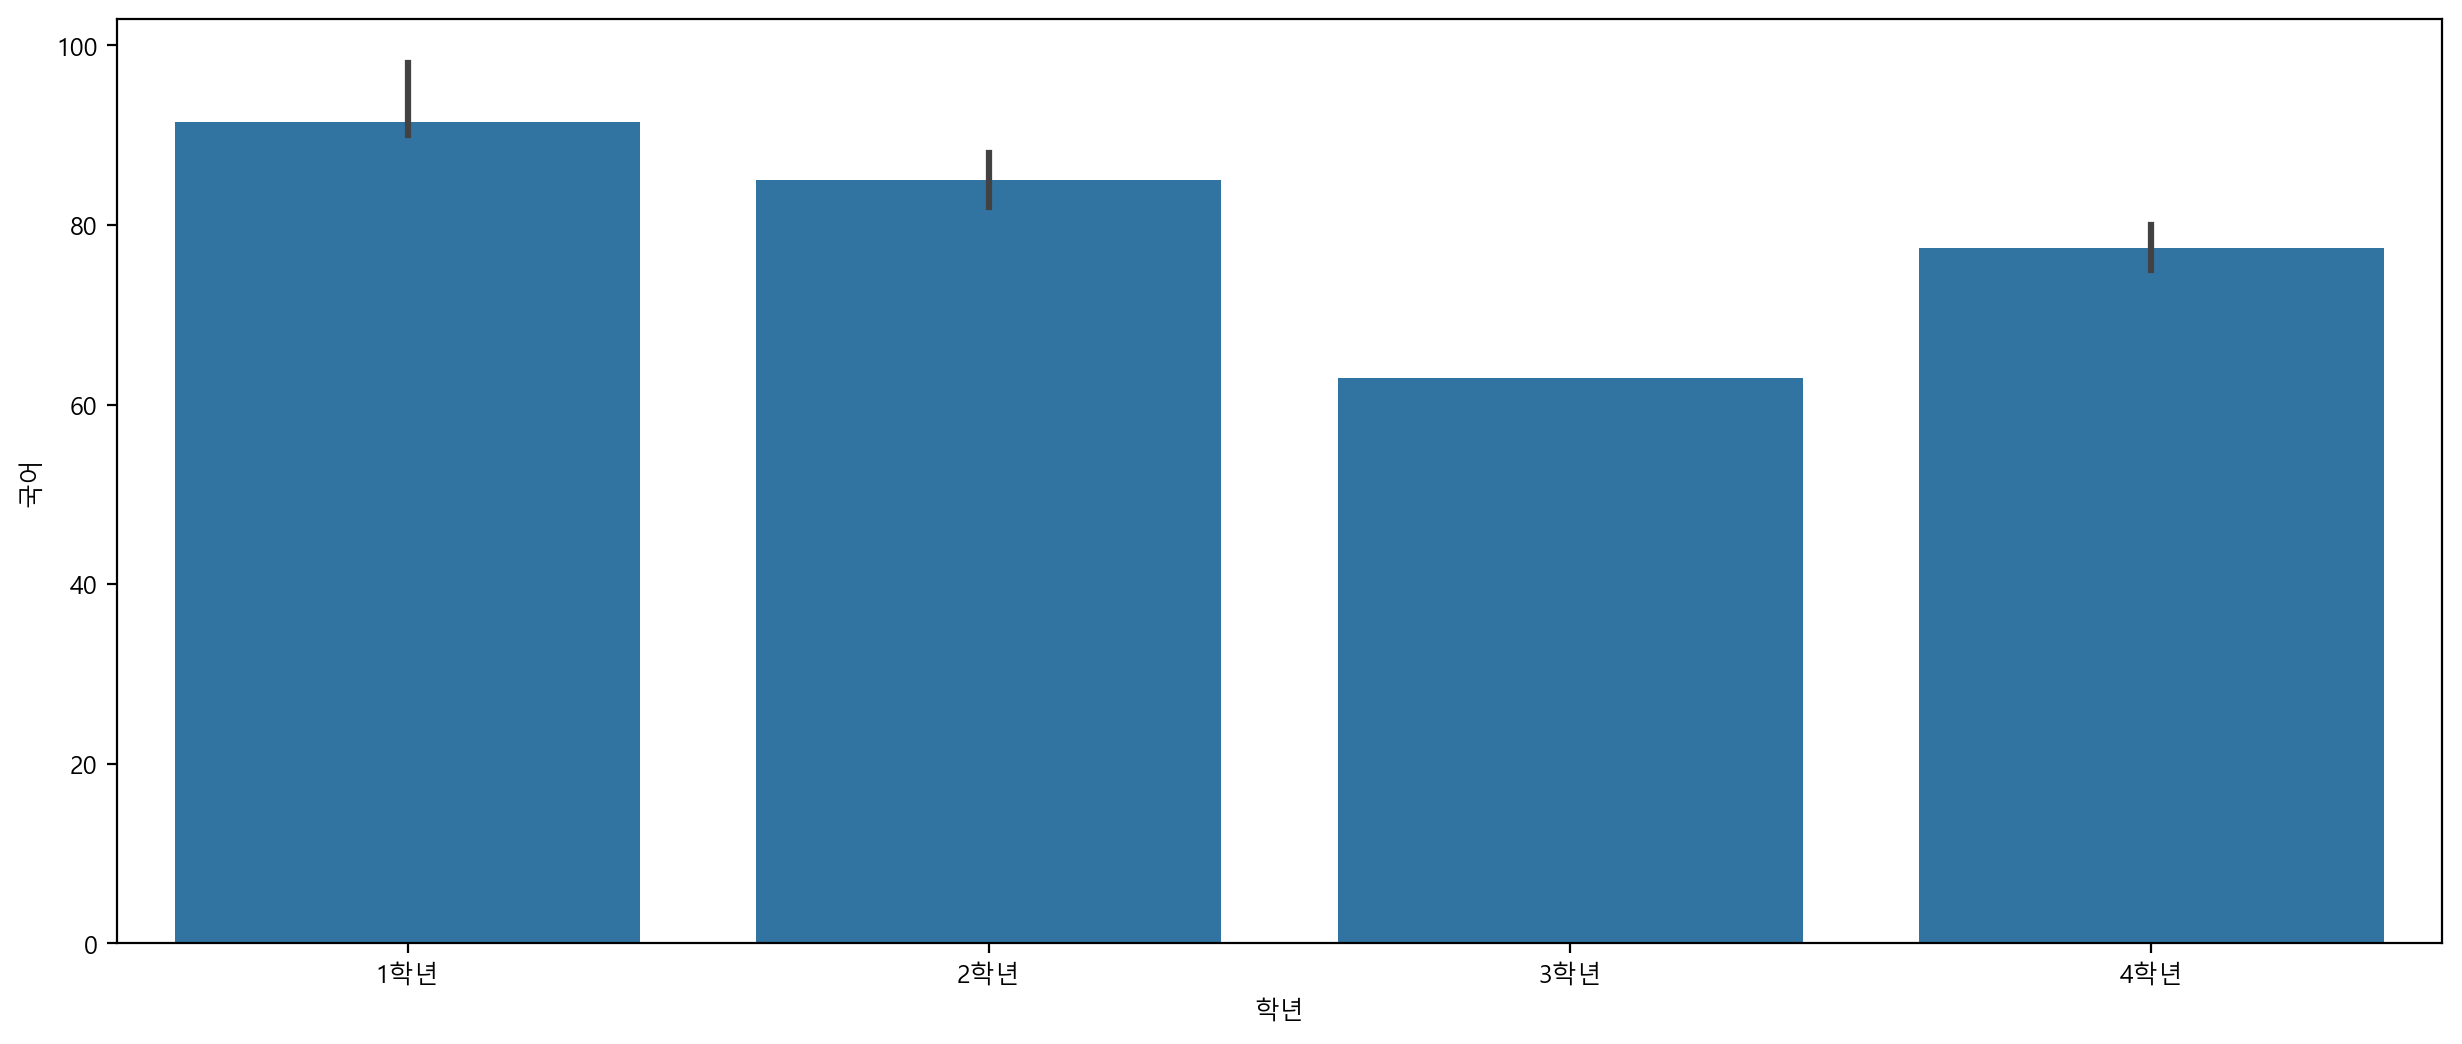

In [10]:
sb.barplot(data=df, x='학년', y='국어', estimator='median')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()
plt.close()

## #03. 범주에 따른 구분

### `hue` 파라미터의 적용

In [11]:
df2 = df.reset_index()
df2

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,77,88,64
1,영희,2,여자,88,120,62,72
2,민철,1,남자,92,70,83,79
3,수현,3,여자,63,60,31,71
4,호영,4,남자,75,50,90,88
5,영호,4,남자,80,88,91,72
6,용식,2,남자,82,88,79,90
7,나영,1,여자,90,92,81,95
8,석영,1,남자,91,90,89,80


In [12]:
df3 = melt(df2[['이름', '국어', '영어', '수학']],
           id_vars='이름',                      # 유지해야 할 변수
           value_vars=['국어', '영어', '수학'],  # 재배치 하고자 하는 변수
           var_name='과목',              # 컬럼명으로 생성되는 변수의 이름
           value_name='점수'             # 기존의 데이터가 재배치되는 변수 이름
        )
df3.sort_values('이름')

,이름,과목,점수
16,나영,영어,92
25,나영,수학,81
7,나영,국어,90
20,민철,수학,83
2,민철,국어,92
11,민철,영어,70
17,석영,영어,90
8,석영,국어,91
26,석영,수학,89
12,수현,영어,60


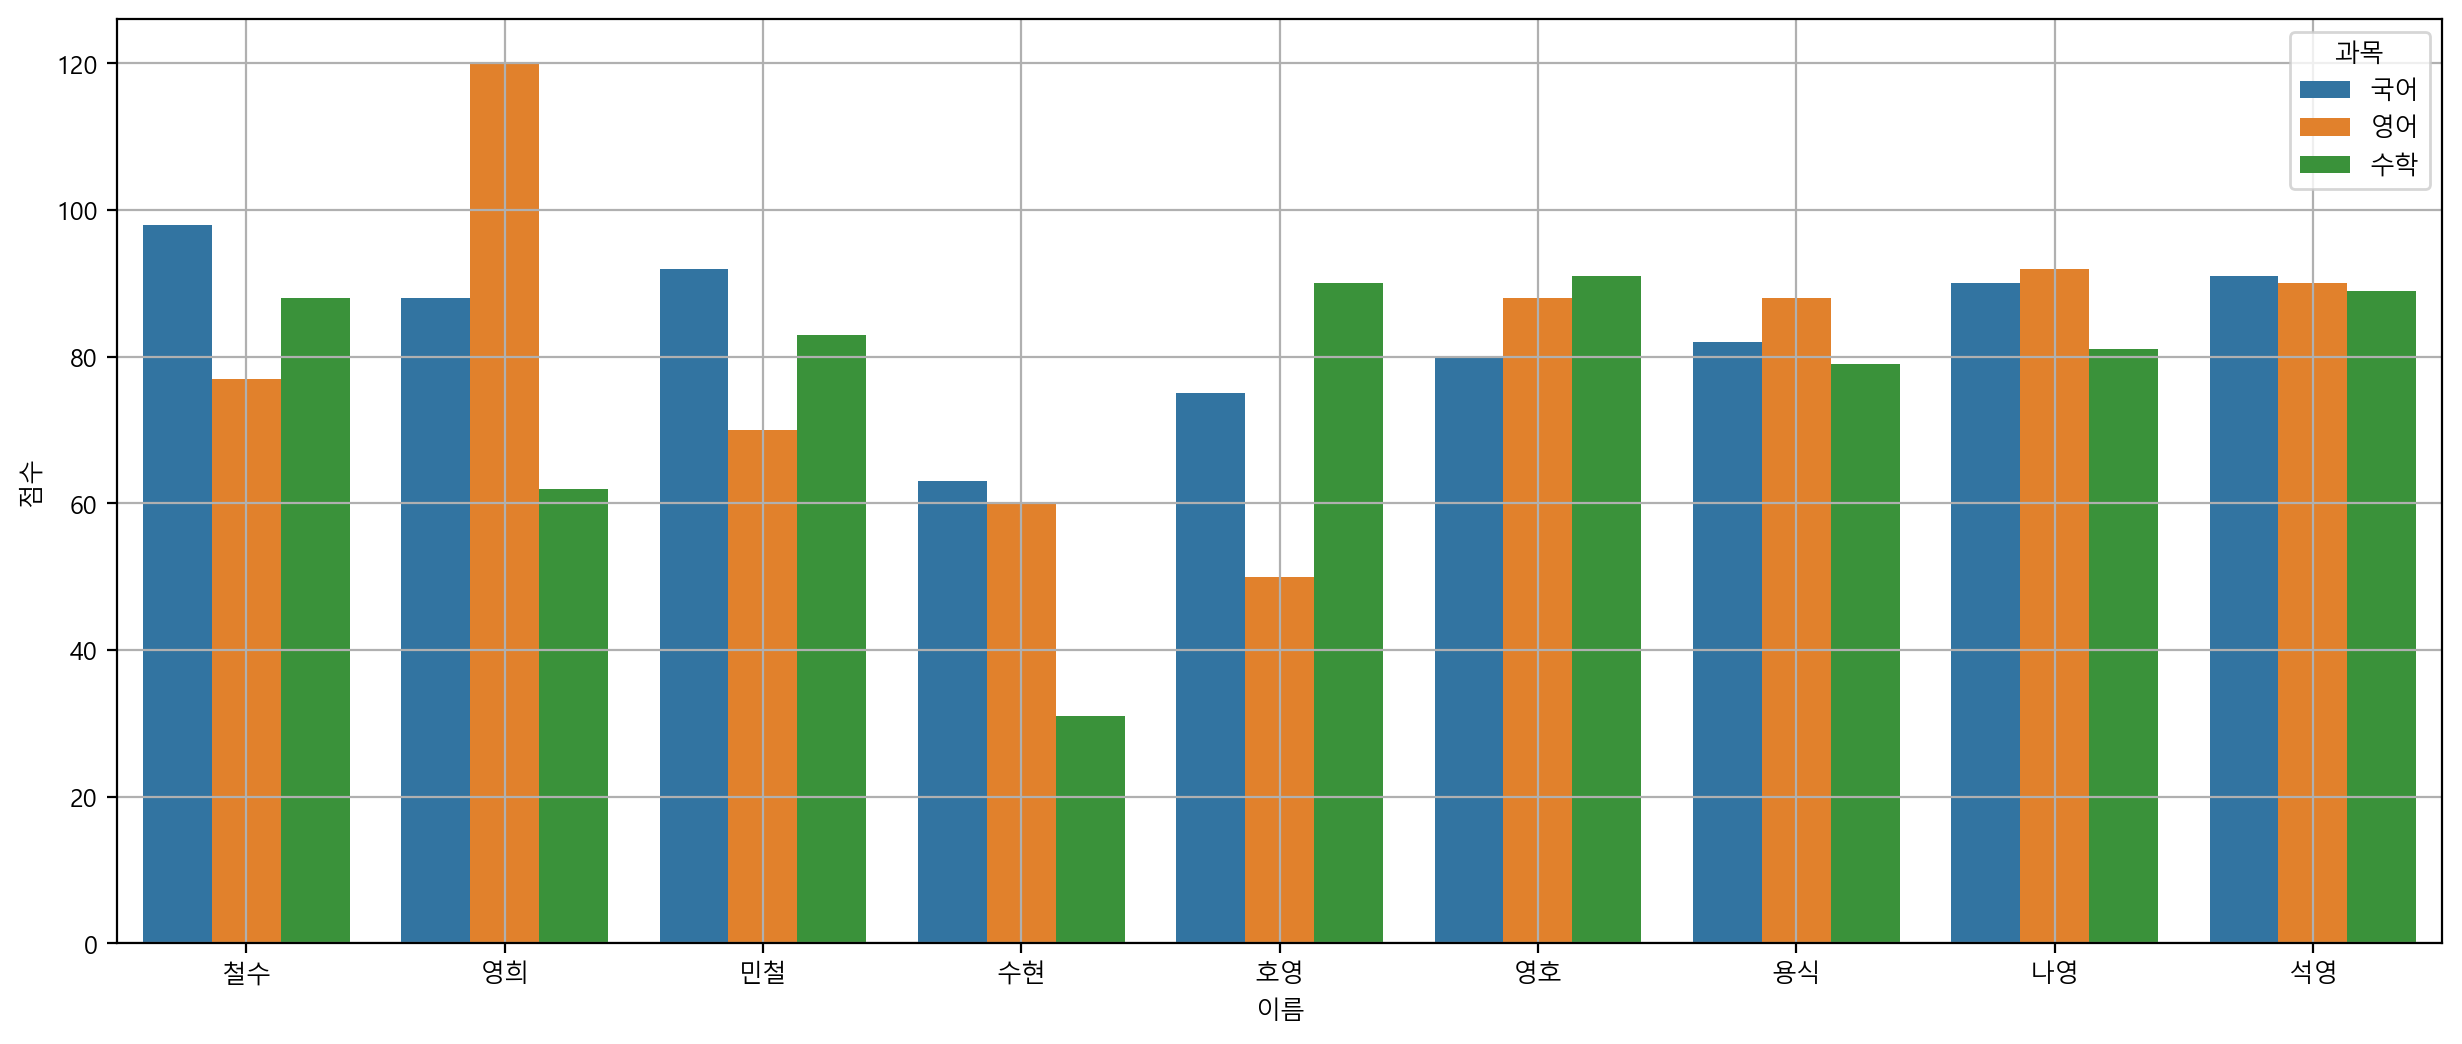

In [13]:
plt.figure()
sb.barplot(data=df3, x='이름', y='점수', hue='과목', estimator='median')
plt.grid()
plt.show()
plt.close()

### 범주 위치 옮기기

`bbox_to_anchor=(x,y)` 파라미터로 범주의 좌표를 지정한다.

왼쪽 하단이 `(0,0)`이고 우측 상단이 `(1,1)`이다.

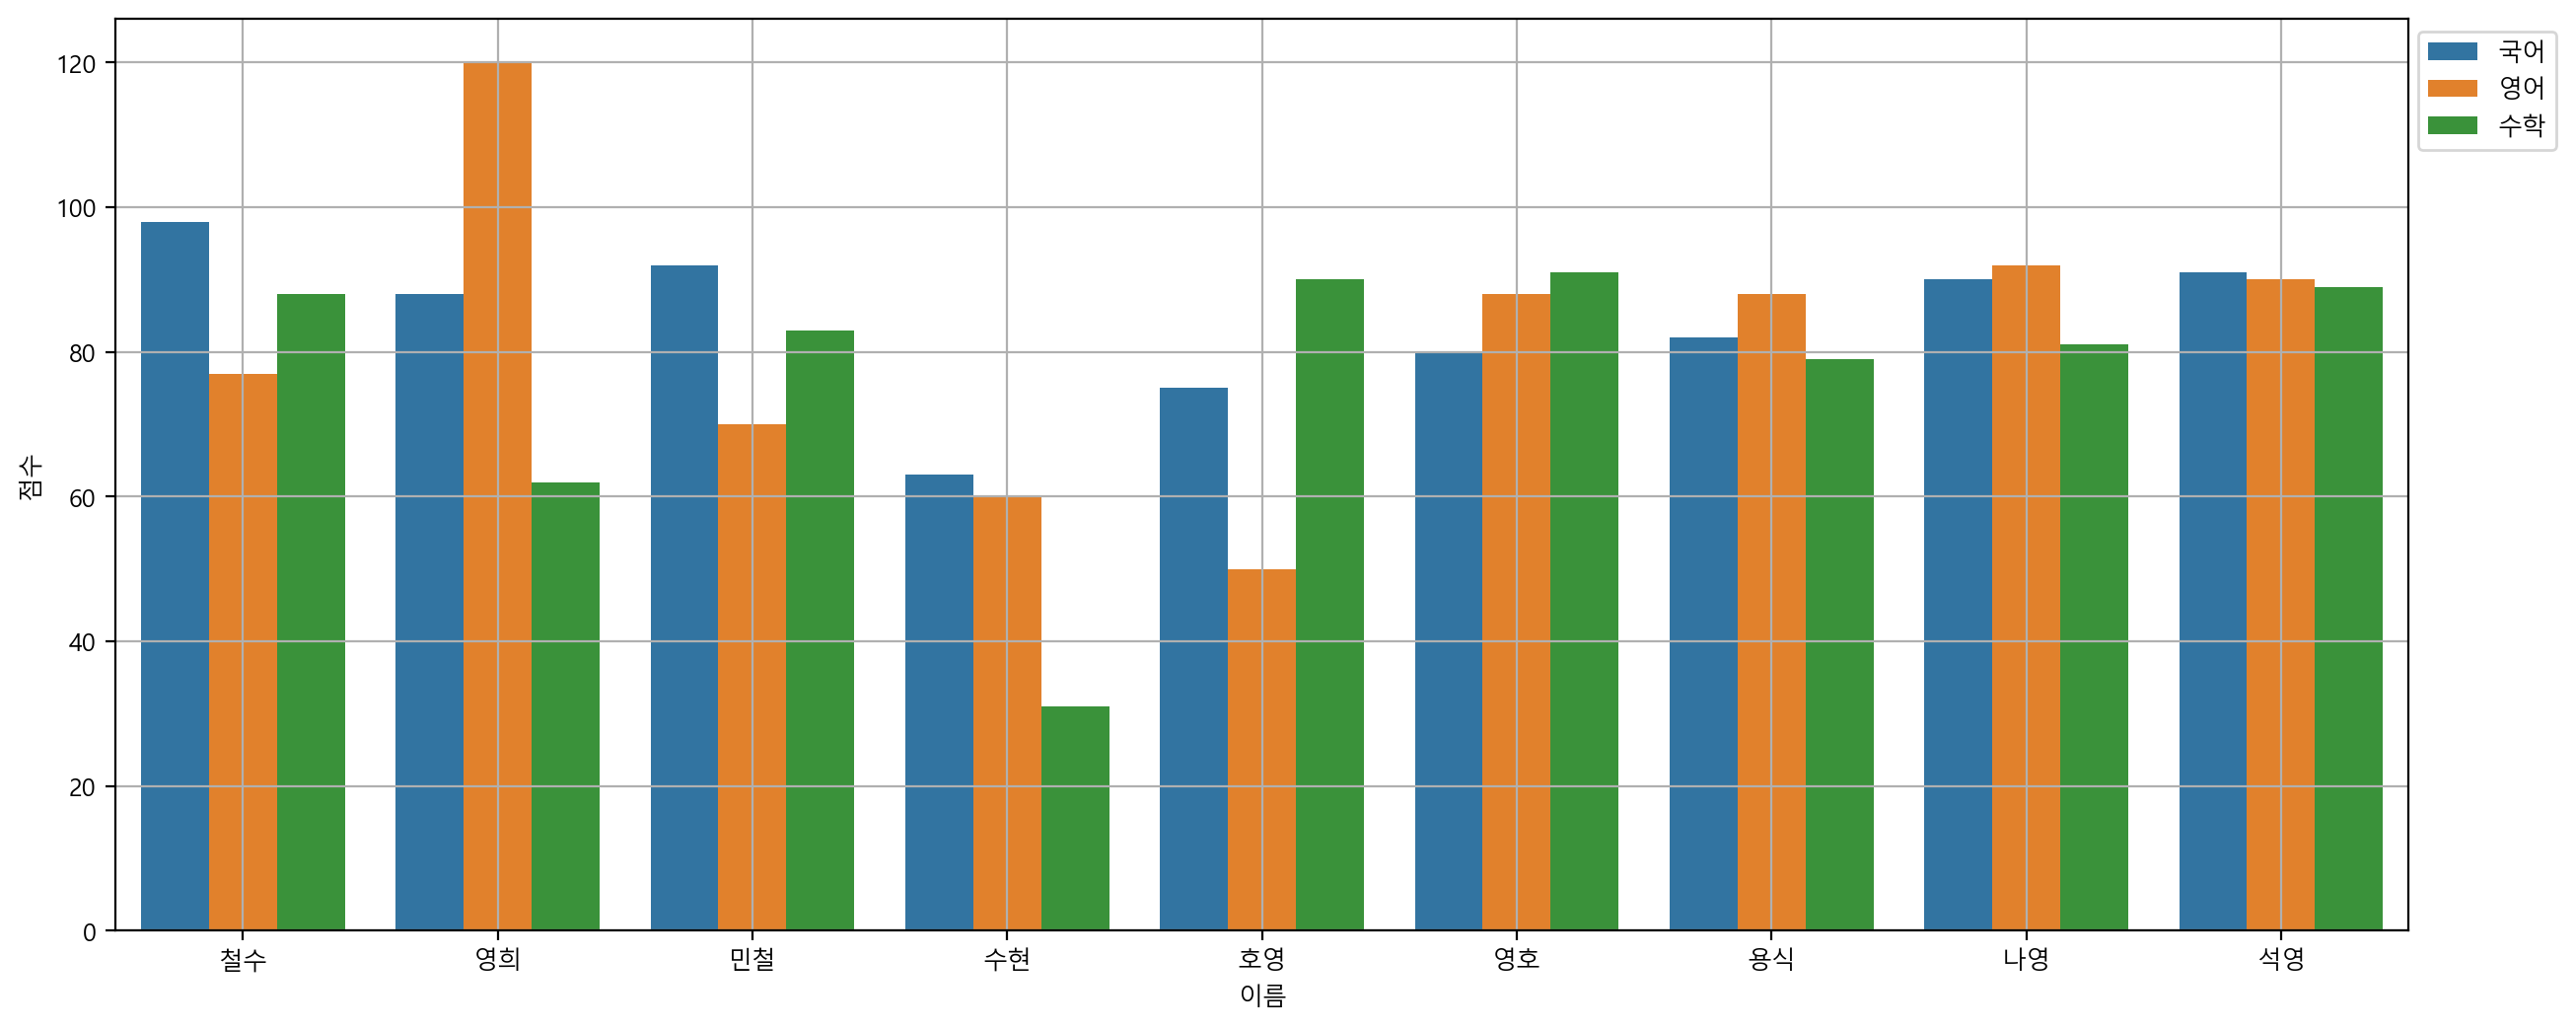

In [14]:
plt.figure()
sb.barplot(data=df3, x='이름', y='점수', hue='과목', estimator='median')
plt.grid()
plt.legend(bbox_to_anchor=(1.07,1))
plt.show()
plt.close()

## #04. 수평 막대 그래프

`x`축과 `y`축을 바꿔 설정하고 `orient='h'` 파라미터를 추가한다.

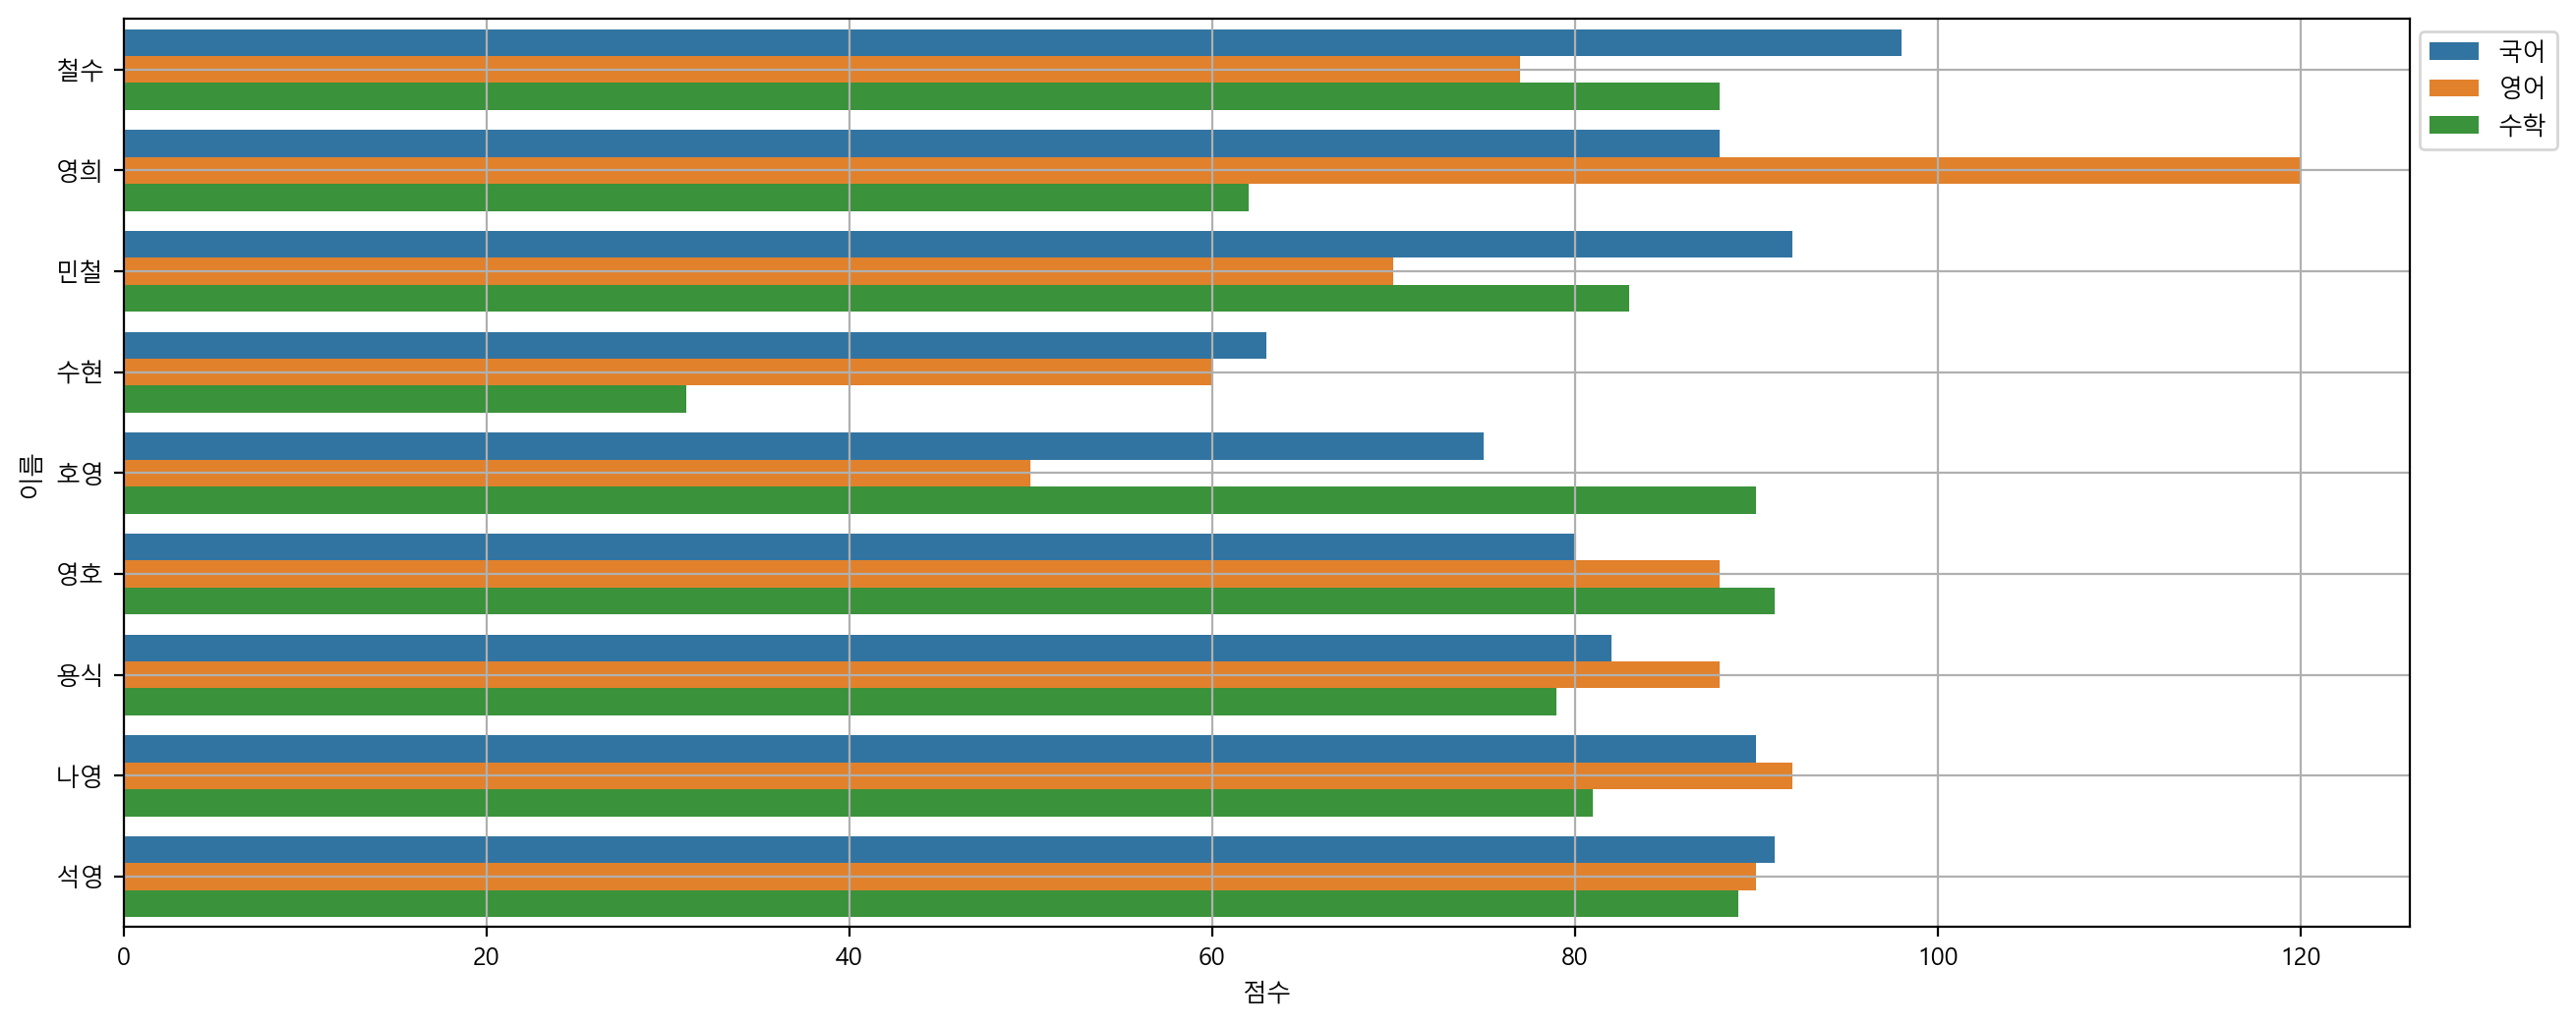

In [15]:
plt.figure()
sb.barplot(data=df3, x='점수', y='이름', hue='과목', estimator='median', orient='h')
plt.grid()
plt.legend(bbox_to_anchor=(1.07,1))
plt.show()
plt.close()